# University of Exeter
## College of Engineering, Mathematics and Physical  Sciences
### ECM3420/ECMM445 - Learning From Data

#### Coursework 2 - Clutering

### Enter your candidate number here:

In [293]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import random as rd


def importcsv(path_csv, names):
    """
    Simple csv import as pandas dataframe
    """
    return pd.read_csv(path_csv, sep=',', names=names)

iris_class_names = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
iris_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "Class?"]
wine_names = ["Alcohol", "Malic Acid", "Ash", "Alcanlinity of Ash", "Magnesium", "Total Phenols","Flavanoids", "Nonflavanoid phenols", "Proantyocycanis", "Colour Intensity", "Hue", "OD280/OD315 of diluted wines", "proline"]
iris = importcsv(r'C:\Users\joshi\Desktop\ca2\iris.txt', iris_names)
wine = importcsv(r'C:\Users\joshi\Desktop\ca2\wine.txt', wine_names)

## WP1

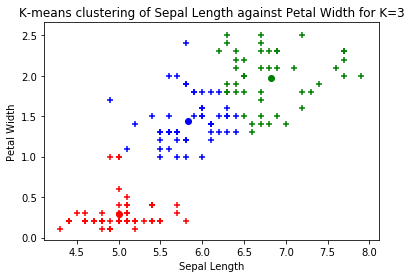

In [712]:
def kmeans(x, k, max_itr=100):
    """
    Super Function for K-Means implementation
    x - raw data set as x and y vectors
    k - number of means/centroids
    max_itr - Maximum number of iterations
    
    Returns: 
    Centroid_ds - A list of lists, lists of points indexed by their assigned centroid (specification)
    centroids - A list of coordinates for the final centroids (for my plotter)
    """
    point_data = list(zip(x[0],x[1]))
    max_x_bound, max_y_bound = max(x[0]), max(x[1])
    min_x_bound, min_y_bound = min(x[0]), min(x[1])
    #Placed random seed centroids within the bounds of the dataset
    centroids = [[rd.uniform(min_x_bound, max_x_bound),rd.uniform(min_y_bound, max_y_bound)] for m in range(k)]
    for b in range(max_itr):
        centroid_ds = classifier(point_data, centroids,k)
        centroids = update_centroids(centroid_ds)
    return centroid_ds, centroids
    
    
def classifier(point_data, centroids,k):
    """
    Helper Function for K-Means : Classifies a list of points into classes
    point_data - raw point data as a list of coordinates
    centroids - list of centroid coordinates
    k - number of centroids
    
    Returns:
    Centroid_ds - A list of lists, lists of points indexed by their assigned centroid
    """
    centroid_ds = [[] for j in range(k)]
    for point in point_data:
        centroid_d = []
        for centroid in centroids: 
            distance = euclid_d((point[0], point[1]), centroid)
            centroid_d.append(distance)
        centroid_ds[centroid_d.index(min(centroid_d))].append(point)
    return centroid_ds
    
def update_centroids(centroid_ds):
    """
    Helper Function for K-Means : Calculates new centroid coordinates
    centroid_ds - A list of lists, lists of points indexed by their assigned centroid
    
    Returns:
    centroids - A list of centroid coordinates
    """
    centroids = []
    for sublist in centroid_ds:
        if len(sublist) > 0:
            centroids.append([sum(x)/len(x) for x in zip(*sublist)])
    return centroids
               
def euclid_d(x,y):
    return math.sqrt(sum([(a-b) ** 2 for a, b in zip(x,y)]))


def plotter(datalist, centroids_list, xlabel, ylabel, title):
    """
    My own plotter to help visualise and validate the function of my K-Means implemenation
    datalist - A list of list of coordinates for every point, indexed by their centroid number.
    centroids_list - list of centroid coordinates
    
    Returns: 
    Generates a graph showing clustered data(as crosses) and their centroids(as dots)
    """
    ax = plt.axes()
    coldict = {0:'r', 1:'b', 2:'g', 3:'y'}
    for n in range(len(centroids_list)):
        for entry in datalist[n]:
            plt.scatter(entry[0],entry[1], color=coldict.get(n), marker='+')
        plt.scatter(centroids_list[n][0],centroids_list[n][1], color=coldict.get(n), marker='o')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()
    
#Simple Validation on iris dataset
plotdata_x = iris["sepal-length"].values    
plotdata_y = iris["petal-width"].values
centroid_ds, centroids = kmeans((plotdata_x, plotdata_y), 3,max_itr=100)
plotter(centroid_ds, centroids, "Sepal Length", "Petal Width", "K-means clustering of Sepal Length against Petal Width for K=3")

0.5619668724678668